# Aerial laser and photogrammetry survey of Dublin city in 2015
Urban Modelling Group, University College Dublin, Ireland

Aerial laser scanning (ALS) and photogrammetry data collected over an area of more than 2km<sup>2</sup> in Dublin city in 2015. Over 1.4 billion laser points were acquired (inclusive of partially covered areas). ALS was carried out by contractors using a TopEye system S/N 443. Imagery data was captured using a Phase One camera system. The average flying altitude was 300m with the total of 41 flight paths.

##### Importing libraries for the notebook

In [6]:
from IPython.display import IFrame, Image, YouTubeVideo, SVG
import json
import gmaps

## Flight paths and timeline of the survey

The following map shows the crossing pattern of the flight, which is oriented 45<sup>o</sup> with the city's major street grid to alleviate the self-shadowing effect and to maximize data coverage on building facades. The flight paths within each parallel set are spaced at 100m intervals so that each location in the surveyed area is scanned 6 times from multiple angles. The red polygon represents the area specified in the survey contract. <br />

<img src="images/svg/meth-data-flight-paths.svg" alt="Flight path planning">

In [7]:
IFrame('https://www.google.com/maps/d/u/1/embed?mid=1_qckqVFNiSC0d_sWjD92FBPNOo8', width='100%', height=600)

The aerial survey was conducted over approximately 4 hours on March 26<sup>th</sup>, 2015. The following chart presents the timeline of the survey. The flight paths are named by their commencement timestamp. For instance, 'F_150326_115601' is the flight strip that began at 11h:56m:01s 26-Mar-2015. This naming convention is used for all datasets in flight structure. In some datasets (e.g. flight trajectory data), the flight paths are partitioned into two sets: (a) starting from 11h:40m:16s; and (b) starting from 14h:44m:11s.

In [8]:
IFrame('html/timeline.html', width='100%', height=500)

## Coverage

The following map shows the survey's data coverage as a set of 500m x 500m tiles. The red polygon indicates the fully covered area with a LiDAR point density of 335 points/m<sup>2</sup> and with all imagery data available. The tiles outside the red polygon are partially covered. Tiles are named by the x-y coordinates of the South-West corners of their grid cell. The naming convention is used for all data structured by tile.

In [9]:
IFrame('https://www.google.com/maps/d/u/0/embed?mid=1xrxVbSRpe6wgVxep6thYUAs8IEY', width='100%', height=600)

## Data components

The survey data consist of the following components:
<ul>
    <li>LiDAR point cloud</li>
    <li>LiDAR full-waveform</li>
    <li>Oblique imagery</li>
    <li>Geo-referenced RGB imagery</li>
    <li>Geo-referenced colored infrared imagery</li>
    <li>Ortho-rectified RGBi imagery</li>
    <li>Video data</li>
    <li>Book-keeping data including project report, data quality reports, metadata, etc.</li>
</ul>

These datasets are organized in either tile structure (500 x 500m grid), flight structure, or both. <br /> 
The following chart shows the component datasets, their structure, and location on the hard drive. Hover over the block to see the datasets's brief description and location.

In [10]:
IFrame('html/data-components.html', width='100%', height=550)

## Detail description of the component datasets
This section describes the content and format of each data component, and suggests software to work with the data.

### LiDAR Point Cloud

A LiDAR point cloud is the primary output of a laser scan. A point cloud is a collection of 3D points, abstractly representing the geometries of the scanned objects (e.g. roads, buildings, trees). In addition to x, y, and z coordinates, each point data record contains a timestamp, a laser intensity value, and several other attributes. See Point Data Format 1 of ASPRS's LAS v1.2 specification for the complete list of point attributes. <br />
<br />
<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td rowspan="2"> LAZ (compressed LAS) </td>
    <td><a href = "http://www.asprs.org/wp-content/uploads/2010/12/asprs_las_format_v12.pdf"> ASPRS LAS v1.2</a> (format 1)</td>
    <td td rowspan="2"> <a href="https://rapidlasso.com/lastools/"> LAStools </a>, <a href ="http://www.danielgm.net/cc/">CloudCompare</a> </td>
  </tr>
  
  <tr>
    <td><a href = "https://www.cs.unc.edu/~isenburg/lastools/download/laszip.pdf"> LASzip </a></td>
  </tr>
</table>

#### Defective files:
(I've done a temporary fix by mixing data from orther formats but will try to retrieve the original files)
<ol>
    <li>dublin_ - Scanner 1 - 150326_124922 - originalpoints.las</li>
    <li>dublin_ - Scanner 1 - 150326_125429 - originalpoints.las</li>
</ol>

#### Sample point cloud data:
<img src="images/png/bkg-sample-points.png" alt="Drawing" style="width: 500px;"/>

In [11]:
# Commnet/uncomment the line below to enable/disable the 3D visualization
IFrame('potree/Dublin15.html', width='100%', height=400)

### LiDAR Full-Waveform Data

Full-waveform data contains raw sensor readings in the form of time-series of laser intensity values. This data complements LiDAR point clouds to provide more information about the data's origin and richer information about the scan scene. The Dublin 2015 full-waveform data are available in 2 formats: (1) ASPRS's LAS format for full-waveform with waveform data stored in auxiliary files (WDP), and (2) Rapidlasso's PulseWaves format.<br />
<br />
<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> LAS, WDP </td>
    <td><a href = "http://www.asprs.org/a/society/committees/standards/asprs_las_spec_v13.pdf"> ASPRS LAS v1.3</a> (format 4)</td>
    <td> <a href="https://rapidlasso.com/lastools/">LAStools</a></td>
  </tr>
  
  <tr>
    <td>PLS, WVS</td>
    <td><a href = "https://github.com/PulseWaves/Specification/blob/master/specification.rst"> PulseWaves </a></td>
    <td><a href = "https://github.com/PulseWaves/Specification/blob/master/specification.rst"> PulseWaves </a></td>
  </tr>
</table>

#### Sample full-waveform data:
<img src="images/png/bkg-sample-fwf.png" alt="Drawing" style="width: 500px;"/>

#### Defective files:
<ol>
    <li> dublin_ - Scanner 1 - 150326_124415 - originalpoints.pls</li>
    <li> dublin_ - Scanner 1 - 150326_124415 - originalpoints.wvs</li>
</ol>

### RGBi Orthophotos

Ortho-rectified imagery data of 5cm resolution are presented in 4 bands: red (R), green (G), blue (B), and infrared (i). The images are stored as 500m x 500m GeoTIFF files. This <a href="images/pdf/fourband_info_sheet_2008.pdf">info sheet</a> from USDA provides further information about the 4-band imagery data.<br />

<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> TIF, TFW </td>
    <td><a href = "https://trac.osgeo.org/geotiff/"> GeoTIFF</a></td>
    <td> <a href="http://www.arcgis.com">ArcGIS</a>, <a href= "https://www.safe.com/fme/fme-desktop/">FME Desktop</a></td>
  </tr>
</table>

#### Defective files:
<ol>
    <li>316500_233500.tif</li>
</ol>

#### Sample ortho-rectified images (RGB and CIR):
<img src="images/png/ortho.png" style="width: 800px">

### Oblique imagery data
Oblique images captured by two separate cameras (SLR1 and SLR2) are stored as JPEG files. One directory is designated for data from each camera. The images within each directory are grouped by flight paths. <br />

In addition to the JPEG files, the directory contains metadata (e.g. camera's geo-location, high-resolution timestamp, etc.) as auxiliary ASCII files.

<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> JPG </td>
    <td><a href = "https://jpeg.org/jpeg/"> JPEG format </a></td>
    <td> various software </td>
  </tr>
</table>

#### Sample oblique images from SLR1 and SLR2 at two consecutive timestamps:
<img src="images/png/slr1-2.png" style="width: 800px">

### RGB Imagery Data
4555 frames of geo-referenced RGB imagery data are structured as flight paths.

<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> TIF </td>
    <td><a href = "https://trac.osgeo.org/geotiff/"> GeoTIFF</a></td>
    <td> <a href="http://www.arcgis.com">ArcGIS</a>, <a href= "https://www.safe.com/fme/fme-desktop/">FME Desktop</a></td>
  </tr>
</table>

#### Defective files:
<ol>
    <li>3489_DUBLIN_AREA_2KM2_rgb_129003_id1650c1_20150326161236.tif</li>
    <li>3489_DUBLIN_AREA_2KM2_rgb_129004_id1651c1_20150326161238.tif</li>
</li>
</ol>

#### Sample geo-referenced RGB images (non geo-rectified)
<img src="images/png/rgb.png" alt="Geo-referenced RGB" style="width: 800px;"/>

### Colored Infrared (CIR) Imagery Data
Geo-referenced CIR imagery data are structured as flight paths. <a href="images/pdf/fs12901.pdf">This factsheet</a>  from USGS explains the derivation and usage of CIR imagery data.

<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> TIF </td>
    <td><a href = "https://trac.osgeo.org/geotiff/"> GeoTIFF</a></td>
    <td> <a href="http://www.arcgis.com">ArcGIS</a>, <a href= "https://www.safe.com/fme/fme-desktop/">FME Desktop</a></td>
  </tr>
</table>

#### Sample geo-referenced CIR images (non geo-rectified)
<img src="images/png/cir.png" alt="Geo-referenced CIR" style="width: 800px;"/>

### Video data
The video dataset is composed of 19 files in MOV format. The videos are in temporal order but are not directly related to other datasets in flight structure.  <br />
<table>
  <tr>
    <th> Format </th>
    <th> Reference </th>
    <th> Software </th>
  </tr>
  
  <tr>
    <td> MOV </td>
    <td><a href = "https://documentation.apple.com/en/finalcutpro/usermanual/index.html#chapter=103%26section=3%26tasks=true"> Apple's movie format </a></td>
    <td> <a href="https://support.apple.com/downloads/quicktime">QuickTime</a></td>
  </tr>
</table>

#### Defective files:
<ol>
    <li>BLADE_S001_S001_T013.MOV</li>
    <li>BLADE_S001_S001_T014.MOV</li>
    <li>BLADE_S001_S001_T015.MOV</li>
    <li>BLADE_S001_S001_T016.MOV</li>
    <li>BLADE_S001_S001_T017.MOV</li>
    <li>BLADE_S001_S001_T018.MOV</li>
</ol>

#### Sample video data:


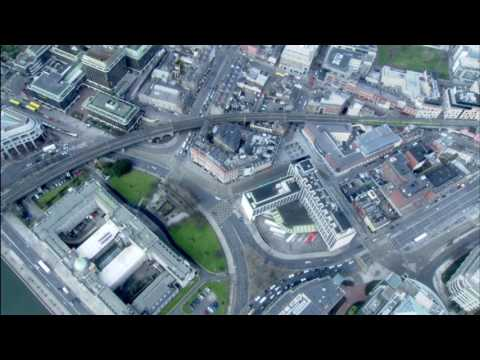

In [12]:
YouTubeVideo('loSoS5MRBZg')

### Other datasets
<ul>
    <li>Reports:
        <ul>
            <li>Project report</li>
            <li>TopEye Area Statistics and Qualities (TASQ) report and data</li>
            <li>Ground Control Point (GCP) report</li>
        </ul>
    </li>
    <li>Flight trajectory: ASCII format</li>
    <li>Camera parameters
        <ul>
            <li>Time data: timestamp of each image file (ASCII format)</li>
            <li>Mosaic: 20cm-resolution mosaic (ECW format)</li>
            <li>Calibration files: ASCII</li>
            <li>tphoto_files: ASCII</li>
            <li>dtm: (BIN format)</li>
        </ul>
    </li>
    <li>Ground survey</li>
        <ul>
            <li>Planning for ground survey</li>
            <li>Ground Control Point (GCP) validation</li>
            <li>Coverage and density validation</li>
        </ul>
</ul>